In [5]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
combine_df = pd.merge(city_df, ride_df, on="city")

# Display the data table for preview
combine_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [1]:
combine_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

Text(0, 0.5, 'Average Fare ($)')

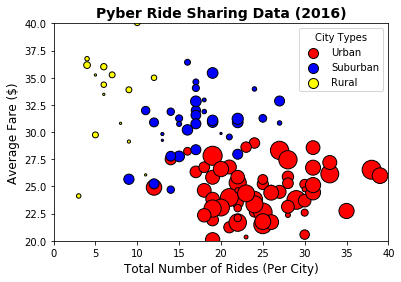

In [13]:
# Obtain the x and y coordinates for each of the three city types

urban_df = combine_df.loc[combine_df['type'] == 'Urban', :]
suburban_df = combine_df.loc[combine_df['type'] == 'Suburban', :]
rural_df = combine_df.loc[combine_df['type'] == 'Rural', :]

#AVERAGE FARE for Urba, Suburban, Rural
urban_avg_fare = urban_df.groupby('city')['fare'].mean()
suburban_avg_fare = suburban_df.groupby('city')['fare'].mean()
rural_avg_fare = rural_df.groupby('city')['fare'].mean()

#Total Number of Rides
urban_total_rides = urban_df.groupby('city')['ride_id'].count()
suburban_total_rides = suburban_df.groupby('city')['ride_id'].count()
rural_total_rides = rural_df.groupby('city')['ride_id'].count()

#Driver Count
urban_driver_size = city_df.loc[city_df['type'] == 'Urban', ['city','driver_count']].set_index('city')
suburban_driver_size = city_df.loc[city_df['type'] == 'Suburban', ['city','driver_count']].set_index('city')
rural_driver_size = city_df.loc[city_df['type'] == 'Rural', ['city','driver_count']].set_index('city')

# Build the scatter plots for each city types
fig, ax = plt.subplots()
plt.scatter(urban_total_rides, urban_avg_fare, marker="o", s=urban_driver_size*5, facecolors="red", edgecolor="black", label="Urban")
plt.scatter(suburban_total_rides, suburban_avg_fare, marker="o",s=suburban_driver_size*5, facecolors="blue", edgecolor="black",  label="Suburban")
plt.scatter(rural_total_rides, rural_avg_fare, marker="o", s=rural_driver_size*5, facecolors="yellow", edgecolor="black", label="Rural")

# Incorporate the other graph properties
plt.grid(linewidth=2, color='white', alpha=0.6)
ax.set_axisbelow(True)
plt.xlim(0, 40)
plt.ylim(20, 40)
# Create a legend

legend = ax.legend(title="City Types")
legend.legendHandles[0]._sizes = [100]
legend.legendHandles[1]._sizes = [100]
legend.legendHandles[2]._sizes = [100]

# Incorporate a text label regarding circle size
plt.title("Pyber Ride Sharing Data (2016)", fontweight='bold', fontsize=14)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.ylabel("Average Fare ($)", fontsize=12)
# Save Figure
plt.savefig('Pyber_Ride_Sharing_Data.png')

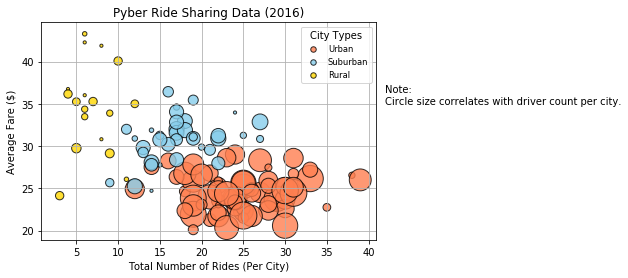

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

Text(0.5, 1.0, '% of Total Fares by City Type')

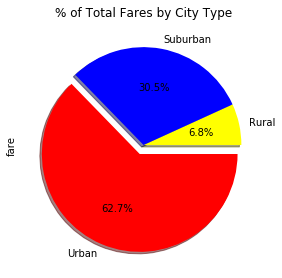

In [27]:
# Calculate Type Percents
total_fares_df = combine_df.groupby('type')['fare'].sum()

# Build Pie Chart
colors = ['yellow', 'blue', 'red']
explode = [0, 0, 0.1]
total_fares_chart = total_fares_df.plot(kind='pie', colors=colors, explode=explode, shadow=True, figsize=(4.5,4.5), autopct="%1.1f%%")
plt.title('% of Total Fares by City Type')
# Save Figure
plt.savefig('Total_Fares.png')

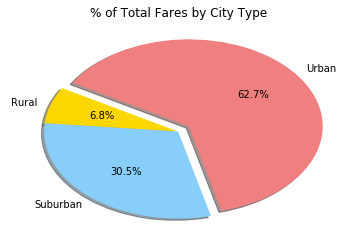

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

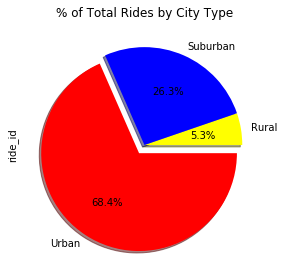

In [30]:
# Calculate Ride Percents
total_rides_df = combine_df.groupby('type')['ride_id'].count()

# Build Pie Chart
colors = ['yellow', 'blue', 'red']
explode = [0, 0, 0.1]
total_rides_chart = total_rides_df.plot(kind='pie', colors=colors, explode=explode, shadow=True, figsize=(4.5,4.5), autopct="%1.1f%%")
plt.title('% of Total Rides by City Type')
# Save Figure
plt.savefig('Total_Ridees_Data.png')

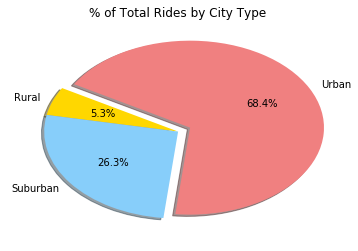

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

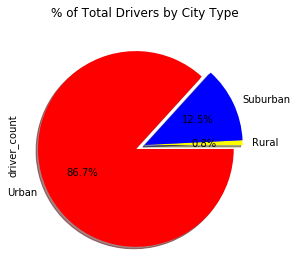

In [33]:
# Calculate Driver Percents
drivers_count = combine_df.groupby('type')['driver_count'].sum()

# Build Pie Charts
colors = ['yellow', 'blue', 'red']
explode = [0, 0, 0.1]
drivers_count_chart = drivers_count.plot(kind='pie', colors=colors, explode=explode, shadow=True, figsize=(4.5,4.5), autopct="%1.1f%%")
plt.title('% of Total Drivers by City Type')
# Save Figure
plt.savefig('Total_Drivers.png')

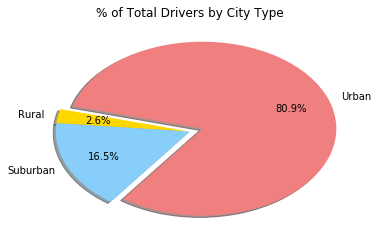

In [6]:
# Show Figure
plt.show()